# 1. Libraries, General Functions & EDA

## 1.1. Libraries

In [73]:
#Regular Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Sci-kit Model Development
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

#Sci-kit Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

#MLxtend
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [2]:
#I'm using mlxtend library for feature selection. You can use this cell to install it by deleting comment hash.
#%pip install mlxtend

## 1.2. General Functions

In [3]:
# Plots Confusion Matrix

def plot_conf_matrix(y_test, predict):
    sns.set(font_scale = 1.1)
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, predict),
                     annot = True,
                     cbar = False,
                     fmt='d')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

In [4]:
# Gives scores for classification.

def score_me(y_test, predicts):
    print('Accuracy: ', metrics.accuracy_score(y_test, predicts))
    print('Precision: ', metrics.precision_score(y_test, predicts))
    print('Recall: ', metrics.recall_score(y_test, predicts))

In [5]:
# Gives ROC Curve and AUC Score

def plot_roc_curve(y_test, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    plt.plot(fpr, tpr, label = 'data 1, AUC= ' + str(auc_score))
    plt.legend(loc=4)
    plt.show()

## 1.3. Exploratory Data Analysis (EDA)

In [6]:
df_ = pd.read_csv(r"C:\Users\myboz\development\datasets\classification\mushroom.csv")
df = df_.copy()

In [7]:
df.head(10)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
9,1085,6,2,10,3.775635,1581,11,0.888450,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [9]:
df['class'].value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

In [10]:
df.isna().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

# 2. Data Preperation for Classification Models

In [11]:
y = df['class']
x = df.drop(columns = ['class'])

In [12]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10, stratify = y)

In [13]:
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 20, stratify=Y_train)

# 3. Application of Classification Models

## 3.1 K-Nearest Neighbors

Let's try with 5 nearest neigbors.

In [14]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [15]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

As we can see our accuracy score is 71%. We can try with less and more nearest neighbors.

In [16]:
knn.score(x_valid, y_valid)

0.7132778163312514

In [17]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
knn.score(x_valid, y_valid)

0.7161693268563497

In [18]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)
knn.score(x_valid, y_valid)

0.7103863058061531

In [19]:
def give_me_knn(neighbor):
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    
    knn.fit(x_train, y_train)
    
    return (knn.score(x_valid, y_valid), neighbor)

In [20]:
accuracy = []

for i in range(2, 11):
    accuracy.append(give_me_knn(i))

accuracy_df = pd.DataFrame(accuracy, columns = ['Score', 'neighbor'])

In [21]:
accuracy_df.sort_values(by = 'Score', ascending = False)

,Score,neighbor
1,0.716169,3
3,0.713278,5
6,0.711890,8
5,0.710386,7
8,0.709577,10
7,0.708651,9
4,0.708189,6
2,0.707148,4
0,0.705644,2


In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
knn.score(x_valid, y_valid)

0.7161693268563497

In [23]:
knn_predicts = knn.predict(x_valid)

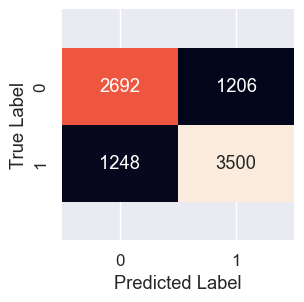

In [24]:
plot_conf_matrix(y_valid, knn_predicts)

In [25]:
score_me(y_valid, knn_predicts)

Accuracy:  0.7161693268563497
Precision:  0.7437314067148322
Recall:  0.7371524852569503


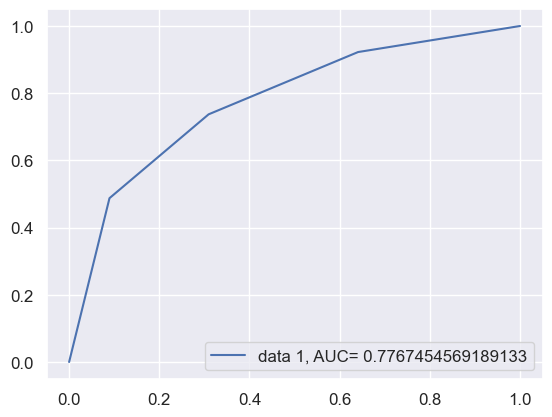

In [26]:
knn_predict_proba = knn.predict_proba(x_valid)
knn_predict_proba_one = knn_predict_proba[:, 1]
plot_roc_curve(y_valid, knn_predict_proba_one)

### KNN with K-Fold Cross Validation

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(knn, X_train, Y_train, cv = 5, scoring = 'accuracy')

print(scores.mean())

0.7131719679811283


In [28]:
knn_cv_scores = []

for i in range (2,26):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, X_train, Y_train, cv = 5, scoring = 'accuracy')
    knn_cv_scores.append([score.mean(), i])

knn_cv_scores_df = pd.DataFrame(knn_cv_scores, columns = ['Accuracy Scores', 'N_Neighbors'])

In [29]:
knn_cv_scores_df.sort_values(by = 'Accuracy Scores', ascending = False)

,Accuracy Scores,N_Neighbors
1,0.713172,3
3,0.709494,5
4,0.707342,6
5,0.706810,7
2,0.706371,4
7,0.704636,9
8,0.703780,10
6,0.703549,8
9,0.703202,11
11,0.702993,13


In [30]:
knn_cv_scores_df.loc[1, ['Accuracy Scores', 'N_Neighbors']]

Accuracy Scores    0.713172
N_Neighbors        3.000000
Name: 1, dtype: float64

## 3.2 Naive Bayes

In [31]:
nb = GaussianNB()

In [32]:
nb.fit(x_train, y_train)

GaussianNB()

In [33]:
nb.score(x_valid, y_valid)

0.6335877862595419

In [34]:
nb_predicts = nb.predict(x_valid)

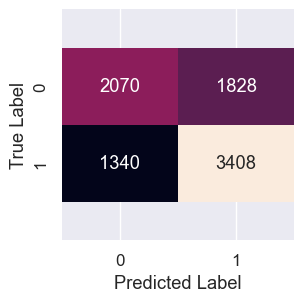

In [35]:
plot_conf_matrix(y_valid, nb_predicts)

In [36]:
score_me(y_valid, nb_predicts)

Accuracy:  0.6335877862595419
Precision:  0.6508785332314744
Recall:  0.7177759056444819


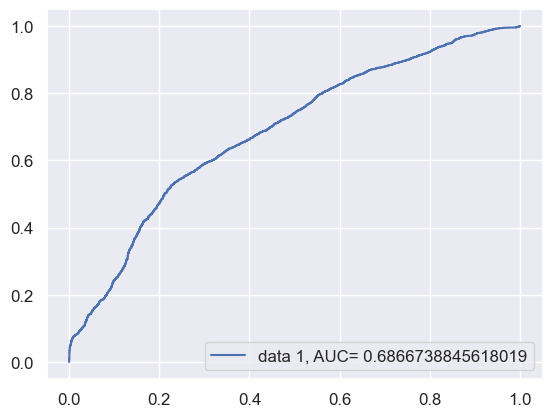

In [37]:
nb_predict_proba = nb.predict_proba(x_valid)
nb_predict_proba_one = nb_predict_proba[:, 1]
plot_roc_curve(y_valid, nb_predict_proba_one)

### Naive Bayes with K-Fold Cross Validation

In [38]:
nb = GaussianNB()
nb_cv_score = (cross_val_score(nb, X_train, Y_train, cv = 5, scoring = 'accuracy')).mean()
print(nb_cv_score)

0.6353752474925637


## 3.3 Logistic Regression

In [39]:
logreg = LogisticRegression(max_iter = 1000, penalty = None)

In [40]:
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, penalty=None)

In [41]:
logreg.coef_

array([[-3.16862922e-04, -8.68593608e-02,  1.58436007e-02,
        -6.16295122e-03,  7.22374287e-01, -3.64030560e-04,
        -7.05405758e-02, -4.62940188e-01]])

In [42]:
logreg.intercept_

array([1.63589083])

In [43]:
logreg_predicts = logreg.predict(x_valid)

In [44]:
accuracy_score(y_valid, logreg_predicts)

0.6331251445755263

In [45]:
logreg.score(x_valid, y_valid)

0.6331251445755263

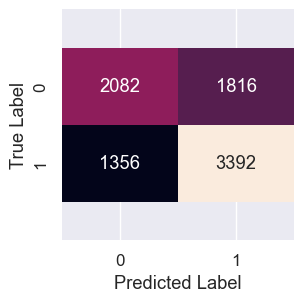

In [46]:
plot_conf_matrix(y_valid, logreg_predicts)

In [47]:
score_me(y_valid, logreg_predicts)

Accuracy:  0.6331251445755263
Precision:  0.6513056835637481
Recall:  0.7144060657118787


In [48]:
logreg_predicts_proba = logreg.predict_proba(x_valid)

In [49]:
logreg_predicts_proba[:10]

array([[0.65801032, 0.34198968],
       [0.34489969, 0.65510031],
       [0.200431  , 0.799569  ],
       [0.54973076, 0.45026924],
       [0.67269765, 0.32730235],
       [0.56555375, 0.43444625],
       [0.28737099, 0.71262901],
       [0.74316809, 0.25683191],
       [0.726445  , 0.273555  ],
       [0.31309551, 0.68690449]])

In [50]:
logreg_predicts_proba_one = logreg_predicts_proba[:, 1]
logreg_predicts_proba_one

array([0.34198968, 0.65510031, 0.799569  , ..., 0.57315023, 0.24050265,
       0.45192986])

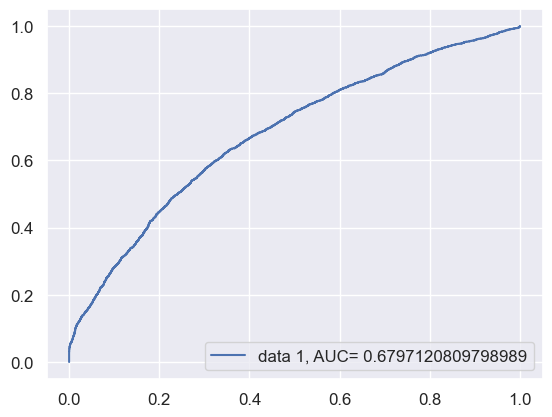

In [51]:
plot_roc_curve(y_valid, logreg_predicts_proba_one)

### Logistic Regression with K-Fold Cross Validation

In [52]:
logreg = LogisticRegression(max_iter = 1000, penalty = None)
logreg_cv_score = (cross_val_score(logreg, X_train, Y_train, cv = 5, scoring = 'accuracy')).mean()
print(logreg_cv_score)

0.6334089534410949


# 4. Result

In [53]:
# Performance Scores of 3 models:

print("K-Nearest Neighbor")
score_me(y_valid, knn_predicts)
print("\nNaive Bayes")
score_me(y_valid, nb_predicts)
print("\nLogistic Regression")
score_me(y_valid, logreg_predicts)

K-Nearest Neighbor
Accuracy:  0.7161693268563497
Precision:  0.7437314067148322
Recall:  0.7371524852569503

Naive Bayes
Accuracy:  0.6335877862595419
Precision:  0.6508785332314744
Recall:  0.7177759056444819

Logistic Regression
Accuracy:  0.6331251445755263
Precision:  0.6513056835637481
Recall:  0.7144060657118787


In [54]:
# Cross Validation Accuracy Scores of 3 models:

print("K-Nearest Neighbor")
print(knn_cv_scores_df.loc[1, 'Accuracy Scores'])
print("\nNaive Bayes")
print(nb_cv_score)
print("\nLogistic Regression")
print(logreg_cv_score)

K-Nearest Neighbor
0.7131719679811283

Naive Bayes
0.6353752474925637

Logistic Regression
0.6334089534410949


As we can see, K-Nearest Neighbor model with N_Neighbor = 3 gives us the best score. Let's train with whole dataset again and check for the final result with test set.

In [55]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
knn.score(x_test, y_test)

0.7209216248727677

# 4. Bonus: Feature Selection Models

## 4.1 Exhaustive Feature Selector

### 4.1.1. K-Nearest Neighbor

Since we already know that 3 neighbors value giving the best result, we can also use it for EFS.

In [56]:
knn = KNeighborsClassifier(n_neighbors = 3)

efs = EFS(knn,
          min_features = 1,
          max_features = 8,
          scoring = 'accuracy',
          print_progress = True,
          cv = 5)
efs.fit(X_train, Y_train)

print('Best Accuracy Score: %.2f' % efs.best_score_)
print('Best subset (indices): ', efs.best_idx_)
print('Best subset (corresponding names): ', efs.best_feature_names_)

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

Best Accuracy Score: 0.93
Best subset (indices):  (1, 2, 3, 4, 6, 7)
Best subset (corresponding names):  ('cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-color', 'season')


In [58]:
efs.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.54649549, 0.53307888, 0.54071247, 0.53591671, 0.54112204]),
  'avg_score': 0.5394651177134102,
  'feature_names': ('cap-diameter',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.54915568, 0.54476058, 0.54545455, 0.55176403, 0.5562753 ]),
  'avg_score': 0.5494820272803398,
  'feature_names': ('cap-shape',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.56130002, 0.51839001, 0.53134397, 0.52215153, 0.51937536]),
  'avg_score': 0.5305121796644496,
  'feature_names': ('gill-attachment',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.58477909, 0.53643303, 0.45940319, 0.54910353, 0.52111047]),
  'avg_score': 0.5301658619939054,
  'feature_names': ('gill-color',)},
 4: {'feature_idx': (4,),
  'cv_scores': array([0.55065926, 0.55389776, 0.55713625, 0.55569693, 0.54979757]),
  'avg_score': 0.5534375548116006,
  'feature_names': ('stem-height',)},
 5: {'feature_idx': (5,),
  'cv_scores': array([0.58605135, 0.58558871, 0.57633588,

In [66]:
knn_efs = KNeighborsClassifier(n_neighbors = 3)

X_train_efs = X_train.loc[:, ['cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-color', 'season']]
x_test_efs = x_test.loc[:, ['cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-color', 'season']]

knn_efs.fit(X_train_efs, Y_train)
knn_efs_score = knn_efs.score(x_test_efs, y_test)
print(knn_efs_score)

0.927917090774498


### 4.1.2. Naive Bayes

In [67]:
nb = GaussianNB()

efs = EFS(nb,
          min_features = 1,
          max_features = 8,
          scoring = 'accuracy',
          print_progress = True,
          cv = 5)
efs.fit(X_train, Y_train)

print('Best Accuracy Score: %.2f' % efs.best_score_)
print('Best subset (indices): ', efs.best_idx_)
print('Best subset (corresponding names): ', efs.best_feature_names_)

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

Best Accuracy Score: 0.65
Best subset (indices):  (1, 3, 4, 5, 6)
Best subset (corresponding names):  ('cap-shape', 'gill-color', 'stem-height', 'stem-width', 'stem-color')


In [70]:
nb_efs = GaussianNB()

X_train_nb = X_train.loc[:, ['cap-shape', 'gill-color', 'stem-height', 'stem-width', 'stem-color']]
x_test_nb = x_test.loc[:, ['cap-shape', 'gill-color', 'stem-height', 'stem-width', 'stem-color']]

nb_efs.fit(X_train_nb, Y_train)
nb_efs_score = nb_efs.score(x_test_nb, y_test)
print(nb_efs_score)

0.6548533358008698


### 4.1.3. Logistic Regression

In [71]:
logreg = LogisticRegression(max_iter = 1000, penalty = None)

efs = EFS(logreg,
          min_features = 1,
          max_features = 8,
          scoring = 'accuracy',
          print_progress = True,
          cv = 5)
efs.fit(X_train, Y_train)

print('Best Accuracy Score: %.2f' % efs.best_score_)
print('Best subset (indices): ', efs.best_idx_)
print('Best subset (corresponding names): ', efs.best_feature_names_)

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

Best Accuracy Score: 0.64
Best subset (indices):  (0, 1, 4, 6, 7)
Best subset (corresponding names):  ('cap-diameter', 'cap-shape', 'stem-height', 'stem-color', 'season')


In [72]:
logreg_efs = LogisticRegression(max_iter = 1000, penalty = None)

X_train_logreg = X_train.loc[:, ['cap-diameter', 'cap-shape', 'stem-height', 'stem-color', 'season']]
x_test_logreg = x_test.loc[:, ['cap-diameter', 'cap-shape', 'stem-height', 'stem-color', 'season']]

logreg_efs.fit(X_train_logreg, Y_train)
logreg_efs_score = logreg_efs.score(x_test_logreg, y_test)
print(logreg_efs_score)

0.6396779864902378


## 4.2 Sequential Feature Selector

### 4.2.1. K-Nearest Neighbor

In [82]:
knn = KNeighborsClassifier(n_neighbors = 3)

sfs = SFS(knn,
          k_features = 8,
          forward = True,
          floating = False,
          verbose = 2,
          scoring = 'accuracy',
          cv = 5)
sfs = sfs.fit(X_train, Y_train)
sfs.subsets_

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca


[2024-05-14 13:27:26] Features: 8/8 -- score: 0.7131719679811283

{1: {'feature_idx': (6,),
  'cv_scores': array([0.55170021, 0.60293777, 0.61889891, 0.60520532, 0.6167727 ]),
  'avg_score': 0.5991029835304644,
  'feature_names': ('stem-color',)},
 2: {'feature_idx': (5, 6),
  'cv_scores': array([0.67164006, 0.6808929 , 0.6770761 , 0.67368421, 0.67171776]),
  'avg_score': 0.675002206846321,
  'feature_names': ('stem-width', 'stem-color')},
 3: {'feature_idx': (2, 5, 6),
  'cv_scores': array([0.77619709, 0.77689105, 0.77318991, 0.77640254, 0.77478311]),
  'avg_score': 0.7754927408201816,
  'feature_names': ('gill-attachment', 'stem-width', 'stem-color')},
 4: {'feature_idx': (2, 3, 5, 6),
  'cv_scores': array([0.81505899, 0.8118205 , 0.81193616, 0.81399653, 0.81931752]),
  'avg_score': 0.8144259383311212,
  'feature_names': ('gill-attachment',
   'gill-color',
   'stem-width',
   'stem-color')},
 5: {'feature_idx': (1, 2, 3, 5, 6),
  'cv_scores': array([0.83044182, 0.82778163, 0.83206107, 0.83331405, 0.83470214]),
  'avg_score': 0.8316601437935306,
  

In [83]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[0.5517002081887578, 0.6029377746934999, 0.618...",0.599103,"(stem-color,)",0.031499,0.024507,0.012254
2,"(5, 6)","[0.6716400647698357, 0.6808928984501503, 0.677...",0.675002,"(stem-width, stem-color)",0.004556,0.003545,0.001772
3,"(2, 5, 6)","[0.7761970853573907, 0.7768910478834143, 0.773...",0.775493,"(gill-attachment, stem-width, stem-color)",0.001733,0.001348,0.000674
4,"(2, 3, 5, 6)","[0.815058986814712, 0.8118204950266019, 0.8119...",0.814426,"(gill-attachment, gill-color, stem-width, stem...",0.00352,0.002739,0.001369
5,"(1, 2, 3, 5, 6)","[0.830441822808235, 0.8277816331251445, 0.8320...",0.83166,"(cap-shape, gill-attachment, gill-color, stem-...",0.003078,0.002395,0.001197
6,"(1, 2, 3, 4, 5, 6)","[0.8335646541753412, 0.8393476752255378, 0.839...",0.837698,"(cap-shape, gill-attachment, gill-color, stem-...",0.002835,0.002206,0.001103
7,"(1, 2, 3, 4, 5, 6, 7)","[0.835646541753412, 0.8391163543835299, 0.8394...",0.838022,"(cap-shape, gill-attachment, gill-color, stem-...",0.001758,0.001368,0.000684
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.71235253296322, 0.7136247975942632, 0.71570...",0.713172,"(cap-diameter, cap-shape, gill-attachment, gil...",0.001796,0.001397,0.000699


In [84]:
knn_sfs = KNeighborsClassifier(n_neighbors = 3)

X_train_sfs = X_train.loc[:, ['cap-shape',
   'gill-attachment',
   'gill-color',
   'stem-height',
   'stem-width',
   'stem-color',
   'season']]
x_test_sfs = x_test.loc[:, ['cap-shape',
   'gill-attachment',
   'gill-color',
   'stem-height',
   'stem-width',
   'stem-color',
   'season']]

knn_sfs.fit(X_train_sfs, Y_train)
knn_sfs_score = knn_sfs.score(x_test_sfs, y_test)
print(knn_sfs_score)

0.8574997686684557


### 4.2.2. Naive Bayes

In [85]:
nb_sfs = GaussianNB()

sfs = SFS(nb_sfs,
          k_features = 8,
          forward = True,
          floating = False,
          verbose = 2,
          scoring = 'accuracy',
          cv = 5)
sfs = sfs.fit(X_train, Y_train)
sfs.subsets_

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

{1: {'feature_idx': (5,),
  'cv_scores': array([0.58755494, 0.59183437, 0.58755494, 0.59548872, 0.58669751]),
  'avg_score': 0.589826097298978,
  'feature_names': ('stem-width',)},
 2: {'feature_idx': (4, 5),
  'cv_scores': array([0.60756419, 0.61993986, 0.60559796, 0.61584731, 0.61515327]),
  'avg_score': 0.612820518172065,
  'feature_names': ('stem-height', 'stem-width')},
 3: {'feature_idx': (1, 4, 5),
  'cv_scores': array([0.63497571, 0.64214666, 0.63439741, 0.63863505, 0.63331405]),
  'avg_score': 0.6366937762920084,
  'feature_names': ('cap-shape', 'stem-height', 'stem-width')},
 4: {'feature_idx': (1, 4, 5, 6),
  'cv_scores': array([0.64654175, 0.6475827 , 0.63913949, 0.64673222, 0.64499711]),
  'avg_score': 0.6449986520778003,
  'feature_names': ('cap-shape', 'stem-height', 'stem-width', 'stem-color')},
 5: {'feature_idx': (1, 3, 4, 5, 6),
  'cv_scores': array([0.64792968, 0.65174647, 0.64769836, 0.65401966, 0.64696356]),
  'avg_score': 0.6496715471484455,
  'feature_names': ('

In [86]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(5,)","[0.5875549386999769, 0.5918343742771224, 0.587...",0.589826,"(stem-width,)",0.004309,0.003353,0.001676
2,"(4, 5)","[0.6075641915336571, 0.619939856581078, 0.6055...",0.612821,"(stem-height, stem-width)",0.006923,0.005387,0.002693
3,"(1, 4, 5)","[0.6349757113115891, 0.642146657413833, 0.6343...",0.636694,"(cap-shape, stem-height, stem-width)",0.004191,0.00326,0.00163
4,"(1, 4, 5, 6)","[0.6465417534119824, 0.6475826972010178, 0.639...",0.644999,"(cap-shape, stem-height, stem-width, stem-color)",0.003915,0.003046,0.001523
5,"(1, 3, 4, 5, 6)","[0.6479296784640296, 0.6517464723571594, 0.647...",0.649672,"(cap-shape, gill-color, stem-height, stem-widt...",0.003519,0.002738,0.001369
6,"(1, 2, 3, 4, 5, 6)","[0.6460791117279667, 0.6487393014110572, 0.642...",0.646479,"(cap-shape, gill-attachment, gill-color, stem-...",0.003849,0.002995,0.001497
7,"(1, 2, 3, 4, 5, 6, 7)","[0.6380985426786954, 0.6306962757344436, 0.641...",0.636254,"(cap-shape, gill-attachment, gill-color, stem-...",0.004523,0.003519,0.00176
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.6339347675225537, 0.635322692574601, 0.6356...",0.635375,"(cap-diameter, cap-shape, gill-attachment, gil...",0.001873,0.001457,0.000729


In [87]:
nb_sfs = GaussianNB()

X_train_sfs = X_train.loc[:, ['cap-shape',
   'gill-color',
   'stem-height',
   'stem-width',
   'stem-color']]
x_test_sfs = x_test.loc[:, ['cap-shape',
   'gill-color',
   'stem-height',
   'stem-width',
   'stem-color']]

nb_sfs.fit(X_train_sfs, Y_train)
nb_sfs_score = nb_sfs.score(x_test_sfs, y_test)
print(nb_sfs_score)

0.6548533358008698


### 4.2.3. Logistic Regression

In [88]:
logreg_sfs = LogisticRegression(max_iter = 1000, penalty = None)

sfs = SFS(logreg_sfs,
          k_features = 8,
          forward = True,
          floating = False,
          verbose = 2,
          scoring = 'accuracy',
          cv = 5)
sfs = sfs.fit(X_train, Y_train)
sfs.subsets_

C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\myboz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca


[2024-05-14 13:27:47] Features: 8/8 -- score: 0.6334089534410949

{1: {'feature_idx': (5,),
  'cv_scores': array([0.59183437, 0.59137173, 0.5920657 , 0.59907461, 0.59132447]),
  'avg_score': 0.593134175319792,
  'feature_names': ('stem-width',)},
 2: {'feature_idx': (4, 5),
  'cv_scores': array([0.59981494, 0.61207495, 0.59784872, 0.60474263, 0.60775014]),
  'avg_score': 0.6044462755672078,
  'feature_names': ('stem-height', 'stem-width')},
 3: {'feature_idx': (1, 4, 5),
  'cv_scores': array([0.61727967, 0.61959288, 0.61380985, 0.61989589, 0.6189705 ]),
  'avg_score': 0.6179097586490114,
  'feature_names': ('cap-shape', 'stem-height', 'stem-width')},
 4: {'feature_idx': (1, 4, 5, 6),
  'cv_scores': array([0.63127458, 0.62907703, 0.62549156, 0.6308849 , 0.62672065]),
  'avg_score': 0.6286897433623027,
  'feature_names': ('cap-shape', 'stem-height', 'stem-width', 'stem-color')},
 5: {'feature_idx': (1, 4, 5, 6, 7),
  'cv_scores': array([0.63462873, 0.63011797, 0.63139024, 0.63724696, 0.626952  ]),
  'avg_score': 0.632067180174854,
  'feature_names': ('

In [89]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(5,)","[0.5918343742771224, 0.5913717325931066, 0.592...",0.593134,"(stem-width,)",0.003834,0.002983,0.001492
2,"(4, 5)","[0.5998149433263937, 0.6120749479528106, 0.597...",0.604446,"(stem-height, stem-width)",0.006658,0.00518,0.00259
3,"(1, 4, 5)","[0.6172796668979875, 0.6195928753180662, 0.613...",0.61791,"(cap-shape, stem-height, stem-width)",0.00288,0.002241,0.00112
4,"(1, 4, 5, 6)","[0.6312745778394634, 0.6290770298403886, 0.625...",0.62869,"(cap-shape, stem-height, stem-width, stem-color)",0.002917,0.00227,0.001135
5,"(1, 4, 5, 6, 7)","[0.6346287300485773, 0.630117973629424, 0.6313...",0.632067,"(cap-shape, stem-height, stem-width, stem-colo...",0.004592,0.003573,0.001786
6,"(0, 1, 4, 5, 6, 7)","[0.6362479759426324, 0.6334721258385381, 0.630...",0.634913,"(cap-diameter, cap-shape, stem-height, stem-wi...",0.004692,0.00365,0.001825
7,"(0, 1, 3, 4, 5, 6, 7)","[0.6378672218366875, 0.6320842007864909, 0.631...",0.634843,"(cap-diameter, cap-shape, gill-color, stem-hei...",0.00483,0.003758,0.001879
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.6357853342586167, 0.6327781633125145, 0.629...",0.633409,"(cap-diameter, cap-shape, gill-attachment, gil...",0.003487,0.002713,0.001357


In [90]:
logreg_sfs = LogisticRegression(max_iter = 1000, penalty = None)

X_train_sfs = X_train.loc[:, ['cap-diameter',
   'cap-shape',
   'stem-height',
   'stem-width',
   'stem-color',
   'season']]
x_test_sfs = x_test.loc[:, ['cap-diameter',
   'cap-shape',
   'stem-height',
   'stem-width',
   'stem-color',
   'season']]

logreg_sfs.fit(X_train_sfs, Y_train)
logreg_sfs_score = logreg_sfs.score(x_test_sfs, y_test)
print(logreg_sfs_score)

0.6364393448690664
